In [1]:
import pandas as pd
import numpy as np

Let's start by loading and exploring the dataset (DF_w_fixedHCT.csv) to understand its structure and characteristics. Then, we'll take a look at the notebook (Data_analysis.ipynb) to understand the existing analysis.

After that, we can proceed to implement feature extraction techniques like PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis) to reduce the dimensions of the dataset. Both PCA and LDA are widely used for dimensionality reduction, but they work on slightly different principles:

PCA: Finds the axes with maximum variance for the whole data set where the data is projected.

LDA: Finds the axes for best class separability, meaning it focuses on maximizing the separation between different classes.

Let's start by loading and exploring the dataset.



In [2]:
# Load the dataset
df = pd.read_csv('/work/DF_w_fixedHCT.csv')

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

(None,
   R1;R2;R4;xcenter;cond_cath;cond_blood;cond_bgrd;HCT;Q;Z_01_04_02_03;Z_01_05_02_03;Z_01_06_02_03;Z_01_07_02_03;Z_01_08_02_03;Z_01_09_02_03;Z_01_10_02_03;Z_01_05_02_04;Z_01_06_02_04;Z_01_07_02_04;Z_01_08_02_04;Z_01_09_02_04;Z_01_10_02_04;Z_01_06_02_05;Z_01_07_02_05;Z_01_08_02_05;Z_01_09_02_05;Z_01_10_02_05;Z_01_07_02_06;Z_01_08_02_06;Z_01_09_02_06;Z_01_10_02_06;Z_01_08_02_07;Z_01_09_02_07;Z_01_10_02_07;Z_01_09_02_08;Z_01_10_02_08;Z_01_10_02_09;Z_01_05_03_04;Z_01_06_03_04;Z_01_07_03_04;Z_01_08_03_04;Z_01_09_03_04;Z_01_10_03_04;Z_01_06_03_05;Z_01_07_03_05;Z_01_08_03_05;Z_01_09_03_05;Z_01_10_03_05;Z_01_07_03_06;Z_01_08_03_06;Z_01_09_03_06;Z_01_10_03_06;Z_01_08_03_07;Z_01_09_03_07;Z_01_10_03_07;Z_01_09_03_08;Z_01_10_03_08;Z_01_10_03_09;Z_01_06_04_05;Z_01_07_04_05;Z_01_08_04_05;Z_01_09_04_05;Z_01_10_04_05;Z_01_07_04_06;Z_01_08_04_06;Z_01_09_04_06;Z_01_10_04_06;Z_01_08_04_07;Z_01_09_04_07;Z_01_10_04_07;Z_01_09_04_08;Z_01_10_04_08;Z_01_10_04_09;Z_01_07_05_06;Z_01_08_05_06;Z_01_09_05_0

It seems like the dataset is not parsed correctly; all the data is in a single column. This might be due to a different delimiter being used. Let's try to read the data again, specifying a likely delimiter (such as a semicolon ";"). Then, we will explore the first few rows of the dataset to understand its structure.

In [3]:
df_1 = _deepnote_execute_sql('SELECT *\nFROM \'DF_w_fixedHCT.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,R1,R2,R4,xcenter,cond_cath,cond_blood,cond_bgrd,HCT,Q,Z_01_04_02_03,...,Z_01_09_06_07,Z_01_10_06_07,Z_01_09_06_08,Z_01_10_06_08,Z_01_10_06_09,Z_01_09_07_08,Z_01_10_07_08,Z_01_10_07_09,Z_01_10_08_09,SpecificSigma
0,1.0,0.0085,0.1,0.000000,0,0.700038263718108+0.0029196881899498i,0.03+0.0179i,47.5,0,40.1756915810334+6.16539404482201i,...,23.4457668427073+7.0704171526798i,20.2566477518158+7.14433536343457i,50.9367484913881+13.5348348662823i,42.7146844463801+14.1234655134764i,69.0580441239471+20.3392933731139i,27.4909816486808+6.46441771360246i,22.4580366945643+6.9791301500418i,48.8013963721313+13.1949580096793i,26.343359677567+6.21582785963752i,0.700038263718108+0.0029196881899498i
1,1.0,0.0085,0.1,0.001625,0,0.700038263718108+0.0029196881899498i,0.03+0.0179i,47.5,0,40.4914274644205+6.18145188568187i,...,23.2832632900134+6.94493372969271i,20.0005996695351+6.99672302086744i,50.3687120614764+13.1314559882379i,41.8070655607312+13.6642106918059i,68.2554240019432+19.7795745569233i,27.0854487714629+6.18652225854521i,21.8064658911961+6.66748767093847i,48.2548243324081+12.7828515360559i,26.448358441212+6.11536386511743i,0.700038263718108+0.0029196881899498i
2,1.0,0.0085,0.1,0.003250,0,0.700038263718108+0.0029196881899498i,0.03+0.0179i,47.5,0,42.4109749202696+6.54130221719903i,...,23.4281789147226+7.0589730036733i,20.1032450838972+7.10035830095998i,51.5274119555644+13.4606628224859i,42.2607864894029+13.9238353206465i,69.2726871607489+20.0616794178508i,28.0992330408418+6.40168981881256i,22.1575414055057+6.82347701968651i,49.1694420768517+12.9613211168908i,27.011900671346+6.13784409720428i,0.700038263718108+0.0029196881899498i
3,1.0,0.0085,0.1,0.004875,0,0.700038263718108+0.0029196881899498i,0.03+0.0179i,47.5,0,44.6587683126948+6.7914402510342i,...,23.361974002196+7.04561932403136i,19.9692424815985+7.07593813225924i,52.5217363441807+13.5798482403756i,42.186168160439+13.9451539627439i,69.9219708659182+20.1411782846846i,29.1597623419847+6.53422891634425i,22.2169256788405+6.86921583048463i,49.9527283843197+13.0652401524254i,27.7358027054792+6.19602432194077i,0.700038263718108+0.0029196881899498i
4,1.0,0.0085,0.1,0.006500,0,0.700038263718108+0.0029196881899498i,0.03+0.0179i,47.5,0,46.5081832401448+6.92308681448486i,...,23.2249662150703+6.97584042989016i,19.7518747297725+7.00191109614116i,53.3687450932968+13.5068393078977i,41.8167105260831+13.7980958435391i,71.009700978888+20.2563083194539i,30.1437788782265+6.53099887800758i,22.0648357963106+6.79618474739795i,51.2578262491155+13.2543972233127i,29.1929904528048+6.45821247591476i,0.700038263718108+0.0029196881899498i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2.0,14.0000,0.1,0.000000,0,0.700038263718108+0.0029196881899498i,0.09+0.0176i,47.5,15,14.7386216906517+0.692149271840291i,...,7.68673153123226+0.795577473374067i,6.64995840336763+0.80472232125094i,17.4761770807765+1.50697213343823i,13.975735038737+1.57756123686339i,23.5083549765358+2.26936777410628i,9.78944554954426+0.711394660064166i,7.32577663536933+0.772838915612454i,16.8583965731682+1.46464545285534i,9.53261993779883+0.691806537242883i,0.806432261395056+0.00336343150313535i
2876,2.0,14.0000,0.1,0.001625,0,0.700038263718108+0.0029196881899498i,0.09+0.0176i,47.5,15,14.9096578344716+0.702452247148617i,...,7.72330152293522+0.796682780454049i,6.66853400900158+0.804905827562786i,17.6050420573853+1.51668476810249i,14.0501133919997+1.5829470809676i,23.661667614425+2.27779585971588i,9.88174053445005+0.720001987648446i,7.3815793829981+0.778041253404817i,16.9931336054234+1.4728900321531i,9.61155422242534+0.694848778748281i,0.806432261395056+0.00336343150313535i
2877,2.0,14.0000,0.1,0.003250,0,0.700038263718108+0.0029196881899498i,0.09+0.0176i,47.5,15,15.302818280913+0.723469215904979i,...,7.84811394403825+0.814211561293942i,6.73284714084207+0.819530703594955i,18.0229406285326+1.55877160385001i,14.2455095404099+1.61696660880876i,24.0220948006981+2.33078138923271i,10.1748266844944+0.744560042556072i,7.

In [4]:
# Try reading the dataset with ";" as the delimiter
df = pd.read_csv('/work/DF_w_fixedHCT.csv', delimiter=';')

# Display basic information and first few rows of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 94 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   R1             2880 non-null   float64
 1   R2             2880 non-null   float64
 2   R4             2880 non-null   float64
 3   xcenter        2880 non-null   float64
 4   cond_cath      2880 non-null   float64
 5   cond_blood     2880 non-null   object 
 6   cond_bgrd      2880 non-null   object 
 7   HCT            2880 non-null   float64
 8   Q              2880 non-null   int64  
 9   Z_01_04_02_03  2880 non-null   object 
 10  Z_01_05_02_03  2880 non-null   object 
 11  Z_01_06_02_03  2880 non-null   object 
 12  Z_01_07_02_03  2880 non-null   object 
 13  Z_01_08_02_03  2880 non-null   object 
 14  Z_01_09_02_03  2880 non-null   object 
 15  Z_01_10_02_03  2880 non-null   object 
 16  Z_01_05_02_04  2880 non-null   object 
 17  Z_01_06_02_04  2880 non-null   object 
 18  Z_01_07_

(None,
     R1      R2   R4   xcenter     cond_cath  \
 0  1.0  0.0085  0.1  0.000000  1.000000e-12   
 1  1.0  0.0085  0.1  0.001625  1.000000e-12   
 2  1.0  0.0085  0.1  0.003250  1.000000e-12   
 3  1.0  0.0085  0.1  0.004875  1.000000e-12   
 4  1.0  0.0085  0.1  0.006500  1.000000e-12   
 
                               cond_blood     cond_bgrd   HCT  Q  \
 0  0.700038263718108+0.0029196881899498i  0.03+0.0179i  47.5  0   
 1  0.700038263718108+0.0029196881899498i  0.03+0.0179i  47.5  0   
 2  0.700038263718108+0.0029196881899498i  0.03+0.0179i  47.5  0   
 3  0.700038263718108+0.0029196881899498i  0.03+0.0179i  47.5  0   
 4  0.700038263718108+0.0029196881899498i  0.03+0.0179i  47.5  0   
 
                         Z_01_04_02_03  ...  \
 0  40.1756915810334+6.16539404482201i  ...   
 1  40.4914274644205+6.18145188568187i  ...   
 2  42.4109749202696+6.54130221719903i  ...   
 3   44.6587683126948+6.7914402510342i  ...   
 4  46.5081832401448+6.92308681448486i  ...   
 
         

In [5]:
# Step 1: Handle Complex Numbers

# Identify columns with complex numbers
complex_cols = [col for col in df.columns if 'i' in df[col].astype(str).iloc[0]]

# Function to extract real and imaginary parts
def extract_complex_parts(complex_str):
    try:
        complex_num = complex(complex_str.replace('i', 'j'))
        return pd.Series([complex_num.real, complex_num.imag], index=['real', 'imag'])
    except ValueError:
        return pd.Series([np.nan, np.nan], index=['real', 'imag'])

# Create new columns for real and imaginary parts
for col in complex_cols:
    df[[f"{col}_real", f"{col}_imag"]] = df[col].apply(extract_complex_parts)

# Drop the original complex number columns
df = df.drop(columns=complex_cols)

# Display the modified dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 181 entries, R1 to SpecificSigma_imag
dtypes: float64(180), int64(1)
memory usage: 4.0 MB


(None,
     R1      R2   R4   xcenter     cond_cath   HCT  Q  cond_blood_real  \
 0  1.0  0.0085  0.1  0.000000  1.000000e-12  47.5  0         0.700038   
 1  1.0  0.0085  0.1  0.001625  1.000000e-12  47.5  0         0.700038   
 2  1.0  0.0085  0.1  0.003250  1.000000e-12  47.5  0         0.700038   
 3  1.0  0.0085  0.1  0.004875  1.000000e-12  47.5  0         0.700038   
 4  1.0  0.0085  0.1  0.006500  1.000000e-12  47.5  0         0.700038   
 
    cond_blood_imag  cond_bgrd_real  ...  Z_01_09_07_08_real  \
 0          0.00292            0.03  ...           27.490982   
 1          0.00292            0.03  ...           27.085449   
 2          0.00292            0.03  ...           28.099233   
 3          0.00292            0.03  ...           29.159762   
 4          0.00292            0.03  ...           30.143779   
 
    Z_01_09_07_08_imag  Z_01_10_07_08_real  Z_01_10_07_08_imag  \
 0            6.464418           22.458037            6.979130   
 1            6.186522       

In [6]:
# Using a vectorized approach to handle complex numbers

# Function to extract real part from complex string
def extract_real(complex_str):
    try:
        return complex(complex_str.replace('i', 'j')).real
    except ValueError:
        return np.nan

# Function to extract imaginary part from complex string
def extract_imag(complex_str):
    try:
        return complex(complex_str.replace('i', 'j')).imag
    except ValueError:
        return np.nan

# Apply the functions in a vectorized manner
for col in complex_cols:
    df[f"{col}_real"] = df[col].apply(extract_real)
    df[f"{col}_imag"] = df[col].apply(extract_imag)

# Drop the original complex number columns
df = df.drop(columns=complex_cols)

# Display the modified dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


KeyError: 'cond_blood'

In [7]:
# Step 2: Handle Missing Values

# Check for missing values in the dataset
missing_values = df.isna().sum().sort_values(ascending=False)

# Display columns with missing values, if any
missing_values.head(10)


R1                    0
Z_01_08_04_05_imag    0
Z_01_09_04_05_imag    0
Z_01_10_04_05_real    0
Z_01_10_04_05_imag    0
Z_01_07_04_06_real    0
Z_01_07_04_06_imag    0
Z_01_08_04_06_real    0
Z_01_08_04_06_imag    0
Z_01_09_04_06_real    0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

# Step 3: Normalize Data

# Extracting numerical values for PCA
X = df.select_dtypes(include=[np.float64, np.int64])

# Initialize a scaler, then apply it to the features
scaler = StandardScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Checking the normalization
X_scaled_describe = X_scaled.describe()

X_scaled_describe


,R1,R2,R4,xcenter,cond_cath,HCT,Q,cond_blood_real,cond_blood_imag,cond_bgrd_real,...,Z_01_09_07_08_real,Z_01_09_07_08_imag,Z_01_10_07_08_real,Z_01_10_07_08_imag,Z_01_10_07_09_real,Z_01_10_07_09_imag,Z_01_10_08_09_real,Z_01_10_08_09_imag,SpecificSigma_real,SpecificSigma_imag
count,2.880000e+03,2.880000e+03,2880.0,2.880000e+03,2880.0,2880.0,2880.000000,2880.0,2.880000e+03,2.880000e+03,...,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03,2.880000e+03
mean,3.454027e-17,9.128500e-17,0.0,-1.875043e-16,0.0,0.0,0.000000,0.0,4.336809e-19,-1.184238e-16,...,1.184238e-16,1.578984e-16,-2.565849e-16,-5.921189e-17,-3.355341e-16,-7.894919e-17,1.184238e-16,9.868649e-17,3.947460e-16,-4.342206e-16
std,1.000174e+00,1.000174e+00,0.0,1.000174e+00,0.0,0.0,1.000174,0.0,0.000000e+00,1.000174e+00,...,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00
min,-1.224438e+00,-7.073191e-01,0.0,-1.414214e+00,0.0,0.0,-1.626978,0.0,4.336809e-19,-1.341641e+00,...,-1.466658e+00,-9.676326e-01,-1.412105e+00,-9.346072e-01,-1.449568e+00,-9.435197e-01,-1.461480e+00,-9.583272e-01,-2.746136e+00,-2.746136e+00
25%,-1.224438e+00,-7.073191e-01,0.0,-7.071068e-01,0.0,0.0,-0.813489,0.0,4.336809e-19,-6.708204e-01,...,-8.058872e-01,-6.561259e-01,-7.467979e-01,-6.525727e-01,-7.853891e-01,-6.585498e-01,-8.100170e-01,-6.631880e-01,-4.583239e-01,-4.583239e-01
50%,-6.128320e-04,-7.068945e-01,0.0,-1.887130e-16,0.0,0.0,0.000000,0.0,4.336809e-19,0.000000e+00,...,-2.215032e-01,-3.013644e-01,-2.152968e-01,-3.568819e-01,-1.534412e-01,-3.178630e-01,-2.182574e-01,-3.016858e-01,1.432751e-01,1.432751e-01
75%,1.225051e+00,1.414214e+00,0.0,7.071068e-01,0.0,0.0,0.813489,0.0,4.336809e-19,6.708204e-01,...,5.577803e-01,3.751095e-01,6.282932e-01,3.675257e-01,5.694223e-01,3.681849e-01,5.537042e-01,3.594433e-01,6.787624e-01,6.787624e-01
max,1.225051e+00,1.414214e+00,0.0,1.414214e+00,0.0,0.0,1.626978,0.0,4.336809e-19,1.341641e+00,...,3.092916e+00,3.472899e+00,2.778102e+00,3.317249e+00,2.938452e+00,3.380571e+00,3.113410e+00,3.525683e+00,1.482360e+00,1.482360e+00


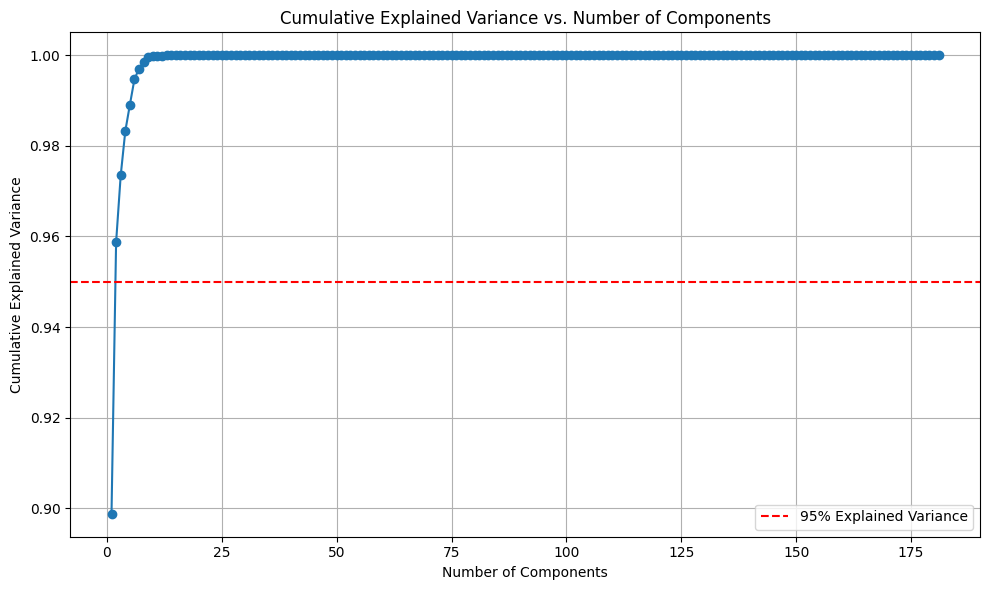

(2, 0.958721808816202)

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA and the X vector for dimensionality reduction
pca = PCA()

# Apply PCA
pca_result = pca.fit_transform(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine the number of components for 95% variance
n_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1 # adding 1 as index starts from 0

n_components_95, cumulative_explained_variance[n_components_95-1]  # subtracting 1 as index starts from 0


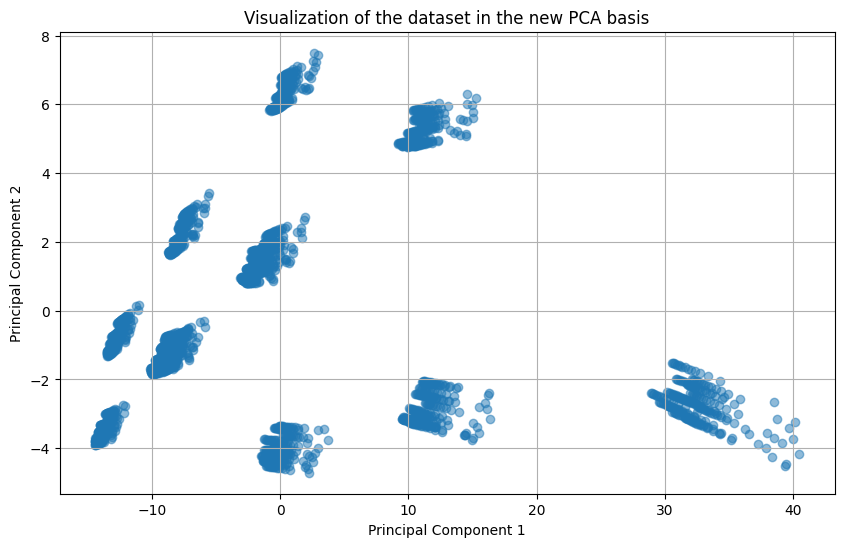

,PC1,PC2
0,37.237212,-3.874306
1,36.579435,-3.574930
2,37.959834,-3.560066
3,38.769954,-3.162533
4,38.498464,-2.645213


In [10]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components_95)
pca_result_95 = pca.fit_transform(X_scaled)

# Convert the PCA result into a DataFrame
pca_df = pd.DataFrame(data=pca_result_95, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

# Visualize the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('Visualization of the dataset in the new PCA basis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Display the first few rows of the reduced dataset
pca_df.head()


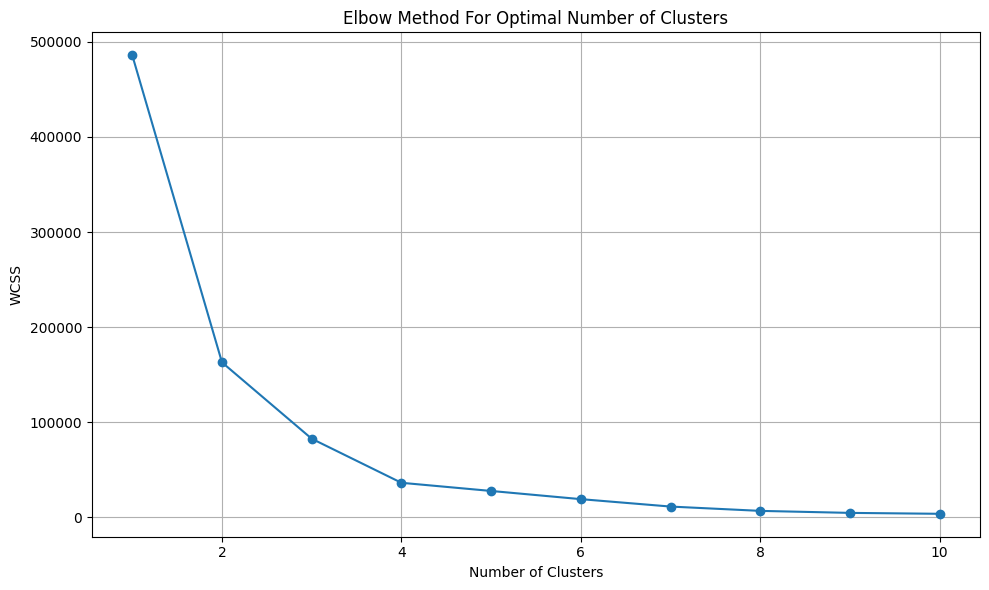

In [11]:
from sklearn.cluster import KMeans

# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 10  # arbitrary, can be set to another number
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the results on a graph (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()


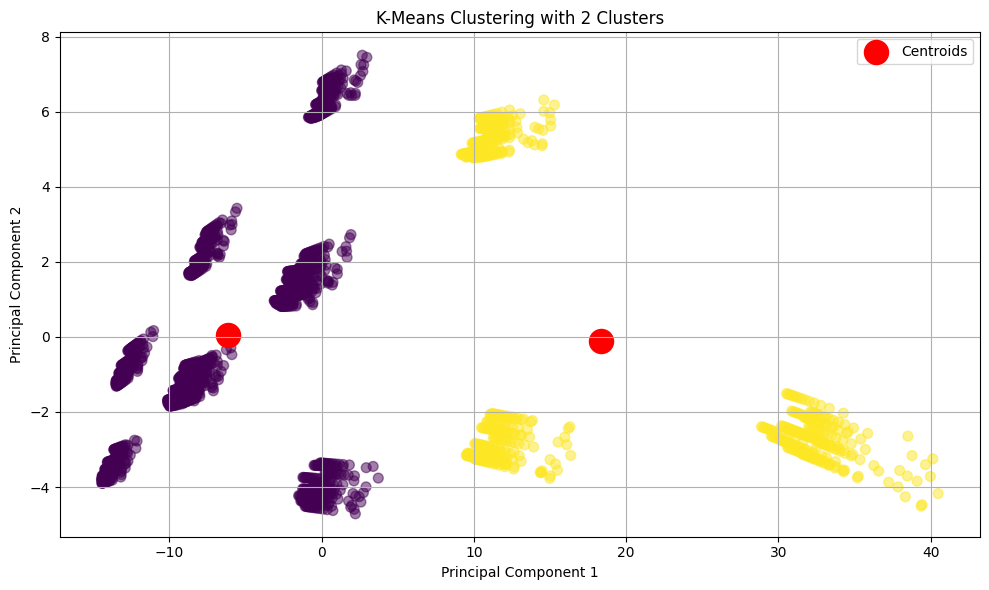

In [12]:
# Function to perform K-Means and visualize the result
def apply_kmeans_and_visualize(n_clusters, data, title):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data['PC1'], data['PC2'], c=pred_y, cmap='viridis', alpha=0.5, s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return pred_y

# Apply K-Means with 2 clusters and visualize
clusters_2 = apply_kmeans_and_visualize(2, pca_df, 'K-Means Clustering with 2 Clusters')


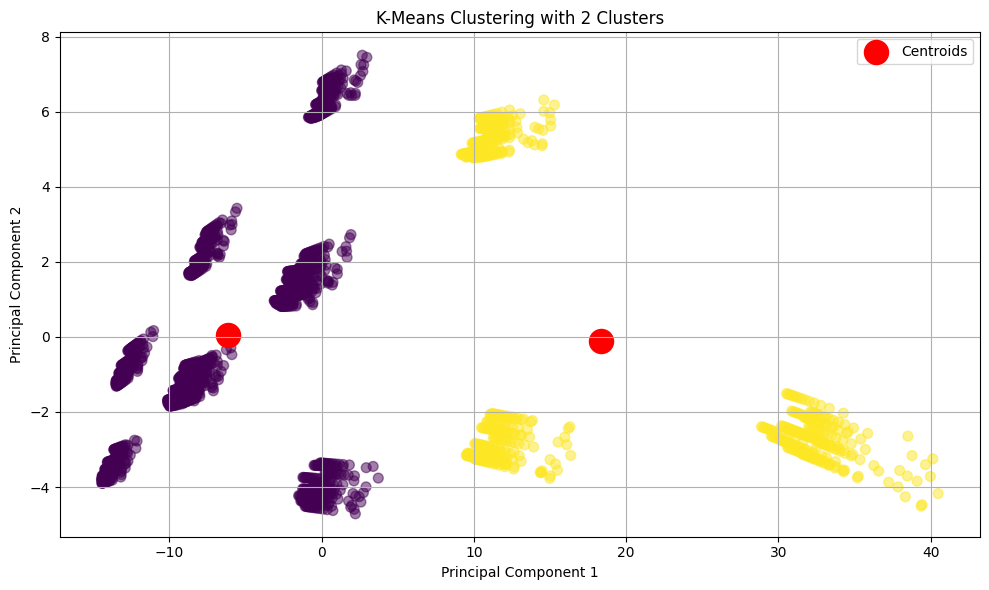

In [13]:
# Apply K-Means with 2 clusters and visualize
clusters_2 = apply_kmeans_and_visualize(2, pca_df, 'K-Means Clustering with 2 Clusters')


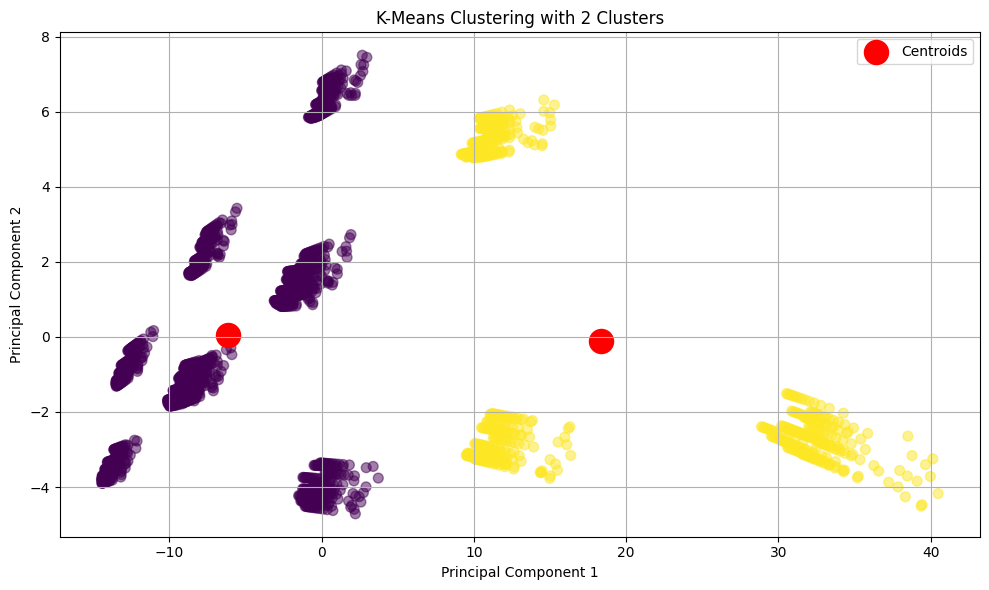

In [14]:
# Reapplying KMeans and visualization after technical issue

# Importing necessary libraries again
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Re-defining the function to apply kmeans and visualize
def apply_kmeans_and_visualize(n_clusters, data, title):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data['PC1'], data['PC2'], c=pred_y, cmap='viridis', alpha=0.5, s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return pred_y

# Loading the PCA result again
pca_df = pd.DataFrame(data=pca_result_95, columns=[f'PC{i}' for i in range(1, 3)])

# Apply K-Means with 2 clusters and visualize
clusters_2 = apply_kmeans_and_visualize(2, pca_df, 'K-Means Clustering with 2 Clusters')


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define number of clusters
n_clusters = 3

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pca_df)


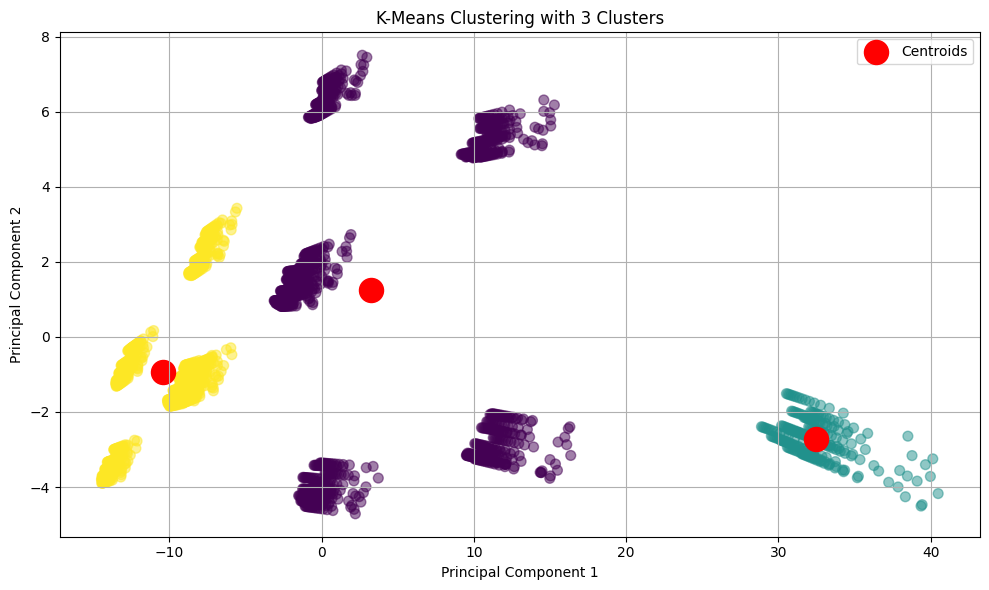

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pred_y, cmap='viridis', alpha=0.5, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Assuming `pred_y` is your cluster assignment from KMeans
# and `original_data` is your original dataset before PCA and scaling.

# 1. Size of Clusters
cluster_sizes = pd.Series(pred_y).value_counts().sort_index()

# 2. Characteristics of Clusters
# Add cluster assignments to the original data
original_data = pd.read_csv('/work/DF_w_fixedHCT.csv')
original_data_with_clusters = original_data.copy()
original_data_with_clusters['Cluster'] = pred_y

# Calculate mean of original features for each cluster
cluster_characteristics = original_data_with_clusters.groupby('Cluster').mean()

# 3. Differences Between Clusters
# This can be observed from the cluster_characteristics dataframe.
# You might visualize differences using bar plots, box plots, etc.

# Example: Visualize the mean value of a specific feature across clusters
import matplotlib.pyplot as plt

feature_to_plot = 'R1:float'  # Replace with a feature name from your dataset
plt.figure(figsize=(10, 6))
plt.bar(cluster_characteristics.index, cluster_characteristics[feature_to_plot])
plt.title(f'Mean {feature_to_plot} Across Clusters')
plt.xlabel('Cluster')
plt.ylabel(f'Mean {feature_to_plot}')
plt.show()

print(original_data.dtypes)
original_data['your_column'] = pd.to_numeric(original_data['your_column'], errors='coerce')
numeric_data = original_data.select_dtypes(include=[np.number])
original_data['your_column'].fillna(value_to_impute, inplace=True)


DataError: No numeric types to aggregate

In [27]:
import pandas as pd

# Load your data
original_data = pd.read_csv('/work/DF_w_fixedHCT.csv')  # Replace with your path

# Check data types
print("Data types before conversion:")
print(original_data.dtypes)

# Convert columns to numeric and handle NaN values
# Replace 'your_column' with your actual column name
original_data['your_column'] = pd.to_numeric(original_data['your_column'], errors='coerce')
original_data['your_column'].fillna(original_data['your_column'].mean(), inplace=True)

# Recheck data types
print("\nData types after conversion:")
print(original_data.dtypes)

# Select only numeric columns
numeric_data = original_data.select_dtypes(include=[np.number])

# Now try performing your aggregation
# For example, calculate the mean of your_column
mean_value = numeric_data['your_column'].mean()
print("\nMean value:", mean_value)


Data types before conversion:
R1;R2;R4;xcenter;cond_cath;cond_blood;cond_bgrd;HCT;Q;Z_01_04_02_03;Z_01_05_02_03;Z_01_06_02_03;Z_01_07_02_03;Z_01_08_02_03;Z_01_09_02_03;Z_01_10_02_03;Z_01_05_02_04;Z_01_06_02_04;Z_01_07_02_04;Z_01_08_02_04;Z_01_09_02_04;Z_01_10_02_04;Z_01_06_02_05;Z_01_07_02_05;Z_01_08_02_05;Z_01_09_02_05;Z_01_10_02_05;Z_01_07_02_06;Z_01_08_02_06;Z_01_09_02_06;Z_01_10_02_06;Z_01_08_02_07;Z_01_09_02_07;Z_01_10_02_07;Z_01_09_02_08;Z_01_10_02_08;Z_01_10_02_09;Z_01_05_03_04;Z_01_06_03_04;Z_01_07_03_04;Z_01_08_03_04;Z_01_09_03_04;Z_01_10_03_04;Z_01_06_03_05;Z_01_07_03_05;Z_01_08_03_05;Z_01_09_03_05;Z_01_10_03_05;Z_01_07_03_06;Z_01_08_03_06;Z_01_09_03_06;Z_01_10_03_06;Z_01_08_03_07;Z_01_09_03_07;Z_01_10_03_07;Z_01_09_03_08;Z_01_10_03_08;Z_01_10_03_09;Z_01_06_04_05;Z_01_07_04_05;Z_01_08_04_05;Z_01_09_04_05;Z_01_10_04_05;Z_01_07_04_06;Z_01_08_04_06;Z_01_09_04_06;Z_01_10_04_06;Z_01_08_04_07;Z_01_09_04_07;Z_01_10_04_07;Z_01_09_04_08;Z_01_10_04_08;Z_01_10_04_09;Z_01_07_05_06;Z_01_0

KeyError: 'your_column'

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your original data
data = pd.read_csv('/work/DF_w_fixedHCT.csv')  # Adjust path accordingly

# Assuming `pred_y` is your cluster assignment from KMeans
data['Cluster'] = pred_y

# Define X (features) and y (target)
X = data.drop(columns=['Cluster'])  # Adjust as per your data
y = data['Cluster']

# 1. Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Visualize Feature Importance
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()

# 2. Classification Tree
dt = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth as per your needs
dt.fit(X, y)

# Visualize Classification Tree
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=[str(c) for c in dt.classes_])
plt.title('Classification Tree')
plt.show()


ValueError: could not convert string to float: '1;0.0085;0.1;0;1E-12;0.700038263718108+0.0029196881899498i;0.03+0.0179i;47.5;0;40.1756915810334+6.16539404482201i;35.2257320331356+6.67125002017457i;32.0316002115186+6.73928583607324i;29.7688815316777+6.62503858911926i;28.1120773246762+6.43011256114703i;26.9075107380788+6.21651735130823i;26.0307451954678+6.01123495625908i;70.8468151581167+13.4510711765563i;62.6222524476969+14.0244333739469i;57.1551978259937+13.9784176771174i;53.1949131573661+13.661539153576i;50.3311564367509+13.2544846286358i;48.2535683722294+12.8379806453415i;94.879839375288+20.8233188630763i;84.4239948958806+21.2852692776447i;77.2494561195515+21.0325254963925i;72.1120019602218+20.5103510568219i;68.4045725640907+19.9079837369525i;114.641528295663+28.0480562521719i;102.417834080163+28.2983272577543i;94.0618769263037+27.8453405425273i;88.0897591317943+27.1320593006773i;130.901952313077+34.8557028336392i;117.507643769011+34.9157576952071i;108.34640688361+34.2763946641118i;144.998625417692+41.3801754088096i;130.804443578174+41.2555248141536i;157.147803255741+47.4713526737911i;35.6210831249811+6.77982115638174i;30.5906522361784+7.28514753787361i;27.386316294316+7.35337908799817i;25.0828358326898+7.23142659242899i;23.4236456986722+7.03796727732758i;22.2228231767617+6.82674568908239i;62.8482391637694+14.084033027003i;54.6551133642028+14.6602306885254i;49.1373787948753+14.6024129352455i;45.2044912221431+14.2938337055137i;42.373827368623+13.8967487806934i;84.8726467639857+21.4230176630526i;74.3057567554863+21.8682146966072i;67.1543661882249+21.6288231912191i;62.0590139363266+21.1208243444182i;102.7898749884+28.4255902724921i;90.6001330309322+28.6992403438989i;82.3156616881423+28.2651597078528i;118.091114679613+35.1636580575013i;104.773698382707+35.2442898578946i;131.117058060274+41.4601177175321i;32.257586927591+6.79888548912943i;27.2687970698868+7.30685160052725i;24.0545429621855+7.37098634281647i;21.7808455234709+7.25586642818613i;20.1510041918613+7.07000309161103i;57.4863304696697+14.0696385750544i;49.2229209227965+14.6367881041782i;43.7307204895527+14.5908559138915i;39.8361907595649+14.2940786553358i;77.7070391557105+21.1941636800631i;67.17648733226+21.6612730665713i;60.0928385113806+21.4384140187704i;94.6674689809408+28.1256907801738i;82.5508752059449+28.4175441688122i;108.894234883512+34.6333720284497i;30.2175333997828+6.7627869745272i;25.168377960611+7.26580176136176i;21.9498749660818+7.33498948570537i;19.6851865677036+7.22407556372476i;53.6524961935251+13.8231773372467i;45.3956418087891+14.4054066383852i;39.9418343195194+14.3684109271593i;72.8866234574699+20.8698243519876i;62.3998710140837+21.3475410772011i;88.7432306916507+27.5633689368386i;28.4841182329141+6.55737557588489i;23.4457668427073+7.0704171526798i;20.2566477518158+7.14433536343457i;50.9367484913881+13.5348348662823i;42.7146844463801+14.1234655134764i;69.0580441239471+20.3392933731139i;27.4909816486808+6.46441771360246i;22.4580366945643+6.9791301500418i;48.8013963721313+13.1949580096793i;26.343359677567+6.21582785963752i;0.700038263718108+0.0029196881899498i'

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your original data
data = pd.read_csv('/work/DF_w_fixedHCT.csv')  # Adjust path accordingly

# Assuming `pred_y` is your cluster assignment from KMeans
data['Cluster'] = pred_y

# One-hot encode categorical columns (adjust column names accordingly)
categorical_columns = ['col1', 'col2']  # Replace with your actual categorical columns
data_encoded = pd.get_dummies(data, col = categorical_columns)

# Define X (features) and y (target)
X = data_encoded.drop(columns=['Cluster'])  # Adjust as per your data
y = data_encoded['Cluster']

# Classification Tree
dt = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth as per your needs
dt.fit(X, y)

# Visualize Classification Tree
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=[str(c) for c in dt.classes_])
plt.title('Classification Tree')
plt.show()


TypeError: get_dummies() got an unexpected keyword argument 'col'

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Assuming `importances` contains feature importance scores
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data * importances)


NameError: name 'importances' is not defined

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  # Adjust as per your needs
fit = rfe.fit(X, y)


ValueError: could not convert string to float: '1;0.0085;0.1;0;1E-12;0.700038263718108+0.0029196881899498i;0.03+0.0179i;47.5;0;40.1756915810334+6.16539404482201i;35.2257320331356+6.67125002017457i;32.0316002115186+6.73928583607324i;29.7688815316777+6.62503858911926i;28.1120773246762+6.43011256114703i;26.9075107380788+6.21651735130823i;26.0307451954678+6.01123495625908i;70.8468151581167+13.4510711765563i;62.6222524476969+14.0244333739469i;57.1551978259937+13.9784176771174i;53.1949131573661+13.661539153576i;50.3311564367509+13.2544846286358i;48.2535683722294+12.8379806453415i;94.879839375288+20.8233188630763i;84.4239948958806+21.2852692776447i;77.2494561195515+21.0325254963925i;72.1120019602218+20.5103510568219i;68.4045725640907+19.9079837369525i;114.641528295663+28.0480562521719i;102.417834080163+28.2983272577543i;94.0618769263037+27.8453405425273i;88.0897591317943+27.1320593006773i;130.901952313077+34.8557028336392i;117.507643769011+34.9157576952071i;108.34640688361+34.2763946641118i;144.998625417692+41.3801754088096i;130.804443578174+41.2555248141536i;157.147803255741+47.4713526737911i;35.6210831249811+6.77982115638174i;30.5906522361784+7.28514753787361i;27.386316294316+7.35337908799817i;25.0828358326898+7.23142659242899i;23.4236456986722+7.03796727732758i;22.2228231767617+6.82674568908239i;62.8482391637694+14.084033027003i;54.6551133642028+14.6602306885254i;49.1373787948753+14.6024129352455i;45.2044912221431+14.2938337055137i;42.373827368623+13.8967487806934i;84.8726467639857+21.4230176630526i;74.3057567554863+21.8682146966072i;67.1543661882249+21.6288231912191i;62.0590139363266+21.1208243444182i;102.7898749884+28.4255902724921i;90.6001330309322+28.6992403438989i;82.3156616881423+28.2651597078528i;118.091114679613+35.1636580575013i;104.773698382707+35.2442898578946i;131.117058060274+41.4601177175321i;32.257586927591+6.79888548912943i;27.2687970698868+7.30685160052725i;24.0545429621855+7.37098634281647i;21.7808455234709+7.25586642818613i;20.1510041918613+7.07000309161103i;57.4863304696697+14.0696385750544i;49.2229209227965+14.6367881041782i;43.7307204895527+14.5908559138915i;39.8361907595649+14.2940786553358i;77.7070391557105+21.1941636800631i;67.17648733226+21.6612730665713i;60.0928385113806+21.4384140187704i;94.6674689809408+28.1256907801738i;82.5508752059449+28.4175441688122i;108.894234883512+34.6333720284497i;30.2175333997828+6.7627869745272i;25.168377960611+7.26580176136176i;21.9498749660818+7.33498948570537i;19.6851865677036+7.22407556372476i;53.6524961935251+13.8231773372467i;45.3956418087891+14.4054066383852i;39.9418343195194+14.3684109271593i;72.8866234574699+20.8698243519876i;62.3998710140837+21.3475410772011i;88.7432306916507+27.5633689368386i;28.4841182329141+6.55737557588489i;23.4457668427073+7.0704171526798i;20.2566477518158+7.14433536343457i;50.9367484913881+13.5348348662823i;42.7146844463801+14.1234655134764i;69.0580441239471+20.3392933731139i;27.4909816486808+6.46441771360246i;22.4580366945643+6.9791301500418i;48.8013963721313+13.1949580096793i;26.343359677567+6.21582785963752i;0.700038263718108+0.0029196881899498i'

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
selector = SelectFromModel(model, threshold=0.2)  # Adjust threshold as per your needs
selector.fit(X, y)
selected_features = X.columns[(selector.get_support())]


ValueError: could not convert string to float: '1;0.0085;0.1;0;1E-12;0.700038263718108+0.0029196881899498i;0.03+0.0179i;47.5;0;40.1756915810334+6.16539404482201i;35.2257320331356+6.67125002017457i;32.0316002115186+6.73928583607324i;29.7688815316777+6.62503858911926i;28.1120773246762+6.43011256114703i;26.9075107380788+6.21651735130823i;26.0307451954678+6.01123495625908i;70.8468151581167+13.4510711765563i;62.6222524476969+14.0244333739469i;57.1551978259937+13.9784176771174i;53.1949131573661+13.661539153576i;50.3311564367509+13.2544846286358i;48.2535683722294+12.8379806453415i;94.879839375288+20.8233188630763i;84.4239948958806+21.2852692776447i;77.2494561195515+21.0325254963925i;72.1120019602218+20.5103510568219i;68.4045725640907+19.9079837369525i;114.641528295663+28.0480562521719i;102.417834080163+28.2983272577543i;94.0618769263037+27.8453405425273i;88.0897591317943+27.1320593006773i;130.901952313077+34.8557028336392i;117.507643769011+34.9157576952071i;108.34640688361+34.2763946641118i;144.998625417692+41.3801754088096i;130.804443578174+41.2555248141536i;157.147803255741+47.4713526737911i;35.6210831249811+6.77982115638174i;30.5906522361784+7.28514753787361i;27.386316294316+7.35337908799817i;25.0828358326898+7.23142659242899i;23.4236456986722+7.03796727732758i;22.2228231767617+6.82674568908239i;62.8482391637694+14.084033027003i;54.6551133642028+14.6602306885254i;49.1373787948753+14.6024129352455i;45.2044912221431+14.2938337055137i;42.373827368623+13.8967487806934i;84.8726467639857+21.4230176630526i;74.3057567554863+21.8682146966072i;67.1543661882249+21.6288231912191i;62.0590139363266+21.1208243444182i;102.7898749884+28.4255902724921i;90.6001330309322+28.6992403438989i;82.3156616881423+28.2651597078528i;118.091114679613+35.1636580575013i;104.773698382707+35.2442898578946i;131.117058060274+41.4601177175321i;32.257586927591+6.79888548912943i;27.2687970698868+7.30685160052725i;24.0545429621855+7.37098634281647i;21.7808455234709+7.25586642818613i;20.1510041918613+7.07000309161103i;57.4863304696697+14.0696385750544i;49.2229209227965+14.6367881041782i;43.7307204895527+14.5908559138915i;39.8361907595649+14.2940786553358i;77.7070391557105+21.1941636800631i;67.17648733226+21.6612730665713i;60.0928385113806+21.4384140187704i;94.6674689809408+28.1256907801738i;82.5508752059449+28.4175441688122i;108.894234883512+34.6333720284497i;30.2175333997828+6.7627869745272i;25.168377960611+7.26580176136176i;21.9498749660818+7.33498948570537i;19.6851865677036+7.22407556372476i;53.6524961935251+13.8231773372467i;45.3956418087891+14.4054066383852i;39.9418343195194+14.3684109271593i;72.8866234574699+20.8698243519876i;62.3998710140837+21.3475410772011i;88.7432306916507+27.5633689368386i;28.4841182329141+6.55737557588489i;23.4457668427073+7.0704171526798i;20.2566477518158+7.14433536343457i;50.9367484913881+13.5348348662823i;42.7146844463801+14.1234655134764i;69.0580441239471+20.3392933731139i;27.4909816486808+6.46441771360246i;22.4580366945643+6.9791301500418i;48.8013963721313+13.1949580096793i;26.343359677567+6.21582785963752i;0.700038263718108+0.0029196881899498i'

In [37]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # Adjust alpha as per your needs
model.fit(X, y)


ValueError: could not convert string to float: '1;0.0085;0.1;0;1E-12;0.700038263718108+0.0029196881899498i;0.03+0.0179i;47.5;0;40.1756915810334+6.16539404482201i;35.2257320331356+6.67125002017457i;32.0316002115186+6.73928583607324i;29.7688815316777+6.62503858911926i;28.1120773246762+6.43011256114703i;26.9075107380788+6.21651735130823i;26.0307451954678+6.01123495625908i;70.8468151581167+13.4510711765563i;62.6222524476969+14.0244333739469i;57.1551978259937+13.9784176771174i;53.1949131573661+13.661539153576i;50.3311564367509+13.2544846286358i;48.2535683722294+12.8379806453415i;94.879839375288+20.8233188630763i;84.4239948958806+21.2852692776447i;77.2494561195515+21.0325254963925i;72.1120019602218+20.5103510568219i;68.4045725640907+19.9079837369525i;114.641528295663+28.0480562521719i;102.417834080163+28.2983272577543i;94.0618769263037+27.8453405425273i;88.0897591317943+27.1320593006773i;130.901952313077+34.8557028336392i;117.507643769011+34.9157576952071i;108.34640688361+34.2763946641118i;144.998625417692+41.3801754088096i;130.804443578174+41.2555248141536i;157.147803255741+47.4713526737911i;35.6210831249811+6.77982115638174i;30.5906522361784+7.28514753787361i;27.386316294316+7.35337908799817i;25.0828358326898+7.23142659242899i;23.4236456986722+7.03796727732758i;22.2228231767617+6.82674568908239i;62.8482391637694+14.084033027003i;54.6551133642028+14.6602306885254i;49.1373787948753+14.6024129352455i;45.2044912221431+14.2938337055137i;42.373827368623+13.8967487806934i;84.8726467639857+21.4230176630526i;74.3057567554863+21.8682146966072i;67.1543661882249+21.6288231912191i;62.0590139363266+21.1208243444182i;102.7898749884+28.4255902724921i;90.6001330309322+28.6992403438989i;82.3156616881423+28.2651597078528i;118.091114679613+35.1636580575013i;104.773698382707+35.2442898578946i;131.117058060274+41.4601177175321i;32.257586927591+6.79888548912943i;27.2687970698868+7.30685160052725i;24.0545429621855+7.37098634281647i;21.7808455234709+7.25586642818613i;20.1510041918613+7.07000309161103i;57.4863304696697+14.0696385750544i;49.2229209227965+14.6367881041782i;43.7307204895527+14.5908559138915i;39.8361907595649+14.2940786553358i;77.7070391557105+21.1941636800631i;67.17648733226+21.6612730665713i;60.0928385113806+21.4384140187704i;94.6674689809408+28.1256907801738i;82.5508752059449+28.4175441688122i;108.894234883512+34.6333720284497i;30.2175333997828+6.7627869745272i;25.168377960611+7.26580176136176i;21.9498749660818+7.33498948570537i;19.6851865677036+7.22407556372476i;53.6524961935251+13.8231773372467i;45.3956418087891+14.4054066383852i;39.9418343195194+14.3684109271593i;72.8866234574699+20.8698243519876i;62.3998710140837+21.3475410772011i;88.7432306916507+27.5633689368386i;28.4841182329141+6.55737557588489i;23.4457668427073+7.0704171526798i;20.2566477518158+7.14433536343457i;50.9367484913881+13.5348348662823i;42.7146844463801+14.1234655134764i;69.0580441239471+20.3392933731139i;27.4909816486808+6.46441771360246i;22.4580366945643+6.9791301500418i;48.8013963721313+13.1949580096793i;26.343359677567+6.21582785963752i;0.700038263718108+0.0029196881899498i'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1452be80-b088-41a0-980a-03dd7d3e3fda' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>